## Pandas 讀取CSV

In [6]:
import pandas as pd
df1 = pd.read_csv("ex1.csv")
print(df1)
print("===================")
df2= pd.read_csv('./ex1.csv',header=None)
print('輸出ex1.csv，省略抬頭那一列')
print(df2)
print("-----")
df3= pd.read_csv('./ex1.csv',names=["A","B","C","D","E"])
print('輸出ex1.csv，column名稱變更')
print(df3)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12    good
輸出ex1.csv，省略抬頭那一列
   0   1   2   3        4
0  a   b   c   d  message
1  1   2   3   4    hello
2  5   6   7   8    world
3  9  10  11  12     good
-----
輸出ex1.csv，column名稱變更
   A   B   C   D        E
0  a   b   c   d  message
1  1   2   3   4    hello
2  5   6   7   8    world
3  9  10  11  12     good


In [13]:
import  pandas as pd
#龘 (音踏)
#犇(音奔)
data={
    'Name':['犇','中文','龘','Ricky'],
    'Age':[28,34,29,42]
}
print(data)
df=pd.DataFrame(data)
print(df)
df.to_csv('df1a.csv')
df.to_csv('df1b.csv',index=False)

{'Name': ['犇', '中文', '龘', 'Ricky'], 'Age': [28, 34, 29, 42]}
    Name  Age
0      犇   28
1     中文   34
2      龘   29
3  Ricky   42


In [14]:
import  pandas as pd
#龘 (音踏)
#犇(音奔)
data={
    'Name':['犇','中文','龘','Ricky'],
    'Age':[28,34,29,42]
}
print(data)
df=pd.DataFrame(data)
print(df)
"""
UTF-8: 這種格式不會在檔案開頭加上 BOM。這是最常見的 UTF-8 格式，
也是大多數系統和應用預設的 UTF-8 編碼方式。
UTF-8-SIG: 這種格式會在檔案開頭加上一個特殊的字元序列（EF BB BF），
這就是所謂的 BOM。BOM 用來指明該檔案使用 UTF-8 編碼，且有助於某些系統識別檔案的編碼格式。
"""
df.to_csv('df1c.csv',index=False,encoding='utf-8-sig')
df.to_csv('df1d.csv',index=True,encoding='utf-8-sig')
df.to_csv('df1e.csv',index=False,encoding='utf-8')
df.to_csv('df1f.csv',index=True,encoding='utf-8')

{'Name': ['犇', '中文', '龘', 'Ricky'], 'Age': [28, 34, 29, 42]}
    Name  Age
0      犇   28
1     中文   34
2      龘   29
3  Ricky   42


In [15]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ------------ --------------------------- 30.7/96.5 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 96.5/96.5 kB 1.1 MB/s eta 0:00:00


In [16]:
import  pandas as pd
import  numpy as np
#龘 (音踏)  犇(音奔)
data={
    'Name':['犇','中文','龘','Ricky'],
    'Age':[28,34,29,42]
}
print(data)
df=pd.DataFrame(data)
writer=pd.ExcelWriter('df.xlsx')#輸出Excel
df.to_excel(writer,'Sheet3')
df1=pd.DataFrame(np.arange(9).reshape(3,3),
                 index=['a','c','d'],
                 columns=['One','Two','Three'])
df1.to_excel(writer,'哈囉')
writer.close()

{'Name': ['犇', '中文', '龘', 'Ricky'], 'Age': [28, 34, 29, 42]}


In [17]:
import  pandas as pd
import  numpy as np
#龘 (音踏)
#犇(音奔)
df=pd.read_excel('df.xlsx')
print(df)
print()
df=pd.read_excel('df.xlsx',1)
print(df)

   Unnamed: 0   Name  Age
0           0      犇   28
1           1     中文   34
2           2      龘   29
3           3  Ricky   42

  Unnamed: 0  One  Two  Three
0          a    0    1      2
1          c    3    4      5
2          d    6    7      8


## 合併

In [18]:
import pandas as pd
d = {'one':pd.Series([1,2,3],index=['a','b','c']),
     'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df1 = pd.DataFrame(d)
print(df1)
df1["three"] = [10,11,12,13]#新增three 
print(df1)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4
   one  two  three
a  1.0    1     10
b  2.0    2     11
c  3.0    3     12
d  NaN    4     13


In [22]:
import pandas as pd
df2 = pd.DataFrame([[20, 21, 22],[23, 24, 25],[26,27, 28]], columns=['one', 'two', 'three'],index=['a','b','c'])
df3= pd.concat([df1,df2],ignore_index=True)#預設垂直合併
#axis = 0 垂直
#axis = 1 水平
df3.index=['a','b','c',"d","e","f","g"]
print(df2)
print("========================")
print(df3)
print("========================")
df4= pd.concat([df1,df2],axis=1,ignore_index=True)#預設水平合併
print(df4)

   one  two  three
a   20   21     22
b   23   24     25
c   26   27     28
    one  two  three
a   1.0    1     10
b   2.0    2     11
c   3.0    3     12
d   NaN    4     13
e  20.0   21     22
f  23.0   24     25
g  26.0   27     28
     0  1   2     3     4     5
a  1.0  1  10  20.0  21.0  22.0
b  2.0  2  11  23.0  24.0  25.0
c  3.0  3  12  26.0  27.0  28.0
d  NaN  4  13   NaN   NaN   NaN


## 刪除

In [27]:
import pandas as pd
d = {'one':pd.Series([1,2,3],index=['a','b','c']),
     'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df1 = pd.DataFrame(d)
df1["three"] = [10,11,12,13]
print(df1)
#axis=1 指的是index的方向
#對於大多數的DataFrame 操作都會產生新的DataFrame
df1.drop("one",axis=1,inplace=True)
print(df1)
df1.drop("c",axis=0,inplace=True)
print(df1)

   one  two  three
a  1.0    1     10
b  2.0    2     11
c  3.0    3     12
d  NaN    4     13
   two  three
a    1     10
b    2     11
c    3     12
d    4     13
   two  three
a    1     10
b    2     11
d    4     13


### 使用 loc(文字 m:n 會包含到n)
+ .loc[ ], 中括弧裡面是先 row 後 column，以逗號分開。
+ row 與 column 要放入的是 row 標籤與 column 標籤。
+ 可於 row 或 column 加入「：」 ，代表指定起訖範圍。

In [32]:
import  pandas as pd
import  numpy as np
df=pd.DataFrame(
    np.arange(48).reshape(6,8),
    index=['a','b','c','d','e','f'],
    columns=['s','t','u','v','w','x','y','z'])
print(df)
print("=======================")
print(df.loc['b',:])
print("=======================")
print(df.loc['c','w'])
print("=======================")
print(df.loc[['c','e'],['w','y']])
print("=======================")
print(df.loc['c':'e','w':'y'])

    s   t   u   v   w   x   y   z
a   0   1   2   3   4   5   6   7
b   8   9  10  11  12  13  14  15
c  16  17  18  19  20  21  22  23
d  24  25  26  27  28  29  30  31
e  32  33  34  35  36  37  38  39
f  40  41  42  43  44  45  46  47
s     8
t     9
u    10
v    11
w    12
x    13
y    14
z    15
Name: b, dtype: int32
20
    w   y
c  20  22
e  36  38
    w   x   y
c  20  21  22
d  28  29  30
e  36  37  38


### 使用 iloc
+ iloc[ ] 與 loc 一樣，中括弧裡面也是先 row 後 column，行列標籤用逗號分開。
+ 與 loc 不同的之處是，.iloc 是根據索引來進行選擇。

In [38]:
import  pandas as pd
import  numpy as np
df=pd.DataFrame(
    np.arange(48).reshape(6,8),
    index=['a','b','c','d','e','f'],
    columns=['s','t','u','v','w','x','y','z'])
print(df)
print("==================")
print(df.iloc[1,:])# "location" 的縮寫
print("==================")
print(df.iloc[2,4])
print("==================")
print(df.iloc[[2,4],[4,6]])
print("==================")
print(df.iloc[2:4,4:6])
print("==================")
print(df.iloc[:,-3])

    s   t   u   v   w   x   y   z
a   0   1   2   3   4   5   6   7
b   8   9  10  11  12  13  14  15
c  16  17  18  19  20  21  22  23
d  24  25  26  27  28  29  30  31
e  32  33  34  35  36  37  38  39
f  40  41  42  43  44  45  46  47
s     8
t     9
u    10
v    11
w    12
x    13
y    14
z    15
Name: b, dtype: int32
20
    w   y
c  20  22
e  36  38
    w   x
c  20  21
d  28  29
a     5
b    13
c    21
d    29
e    37
f    45
Name: x, dtype: int32


In [39]:
import  pandas as pd
import  numpy as np
df=pd.DataFrame(
    np.arange(48).reshape(6,8),
    index=['a','b','c','d','e','f'],
    columns=['s','t','u','v','w','x','y','z']
)
print(df)
print()
print(df.iloc[::2,::3])#Row間隔2 Colum間隔3
print('---1---')
print(df.loc[::2,::3])
print('---2---')

    s   t   u   v   w   x   y   z
a   0   1   2   3   4   5   6   7
b   8   9  10  11  12  13  14  15
c  16  17  18  19  20  21  22  23
d  24  25  26  27  28  29  30  31
e  32  33  34  35  36  37  38  39
f  40  41  42  43  44  45  46  47

    s   v   y
a   0   3   6
c  16  19  22
e  32  35  38
---1---
    s   v   y
a   0   3   6
c  16  19  22
e  32  35  38
---2---


https://sparkbyexamples.com/pandas/pandas-dataframe-query-examples/

In [40]:
import  pandas as pd
data_url='http://bit.ly/2cLzoxH'
gap1=pd.read_csv(data_url)
print(gap1)
print(gap1.count())
is2002 = gap1['year'] == 2002
print(is2002)
data2002 =gap1[is2002] 
print(data2002)
gap2 = gap1.query("year == 2002")
print(gap2)

          country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]
country      1704
year         1704
pop          1704
continent    1704
lifeExp      1704
gdpPercap    1704
dtype: int64
0       False
1       False
2       False
3       

In [41]:
import  pandas as pd
data_url='http://bit.ly/2cLzoxH'
gap1=pd.read_csv(data_url)
print(gap1)
print('想要查詢1997與2007年資料')
is2020=gap1['year'].isin([1997,2007])
print(is2020)
data2020 =  gap1[is2020]
print(data2020)
gap2 = gap1.query("year == 2007 or year == 1997")
print(gap2)

          country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]
想要查詢1997與2007年資料
0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701     True
1702    False
1703     True


In [43]:
import  pandas as pd
data_url='http://bit.ly/2cLzoxH'
gap1=pd.read_csv(data_url)
print(gap1)
print('想要查詢1997到2007年資料')
is2020 = gap1["year"].between(1997,2007)
print(is2020)
data2020 = gap1[is2020]
print(data2020)
gap2 = gap1.query("year.between(1997,2007)")
print(gap2)
gap2.to_html("data1997to2002.html")

          country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]
想要查詢1997到2007年資料
0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701     True
1702     True
1703     True


## 處理日期資訊
+ 可使用 pandas 的 date_range( ) 函數，可以建立日期資料。
+ 默認情況下，範圍的週期單位為天。
+ 若要表達出工作天 (不包含周六周日)，則請選擇 bdate_range( ) 方法。
+ date_range 或 bdate_range( ) 內的參數：
  + ('起始日期', periods=天數)
  + periods 由開始日取幾天
  + ('起始日期','結束日期')
  + 可加入另外一個參數：freq 代表範圍的週期單位
  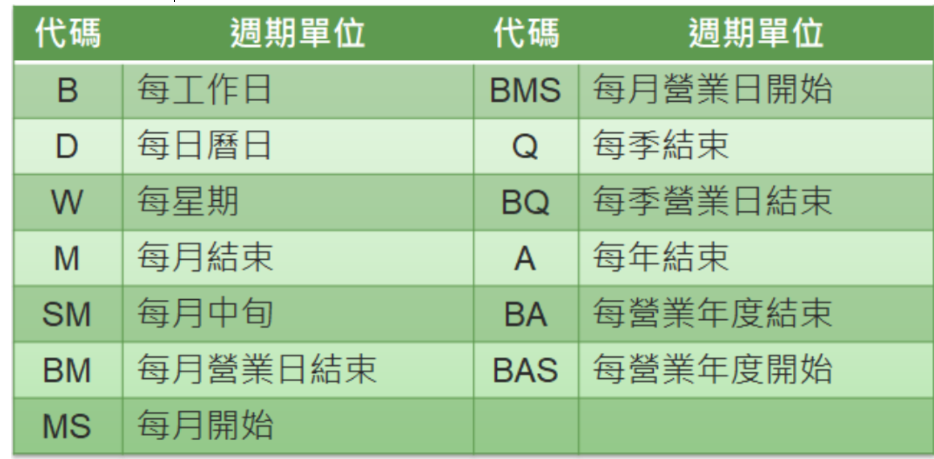
  https://pandas.pydata.org/docs/user_guide/timeseries.html

In [46]:
import pandas as pd
print('日期請調整為上課時的時間')
a=pd.date_range('2023/12/30',periods=10)
print(a)
print('-'*70)
a=pd.date_range('2023/12/30',periods=10,freq='W')
print(a)
print('-'*70)
a=pd.date_range('2023/12/30',periods=10,freq='W-Mon')#每週一
print(a)
print('-'*70)

日期請調整為上課時的時間
DatetimeIndex(['2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02',
               '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06',
               '2024-01-07', '2024-01-08'],
              dtype='datetime64[ns]', freq='D')
----------------------------------------------------------------------
DatetimeIndex(['2023-12-31', '2024-01-07', '2024-01-14', '2024-01-21',
               '2024-01-28', '2024-02-04', '2024-02-11', '2024-02-18',
               '2024-02-25', '2024-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')
----------------------------------------------------------------------
DatetimeIndex(['2024-01-01', '2024-01-08', '2024-01-15', '2024-01-22',
               '2024-01-29', '2024-02-05', '2024-02-12', '2024-02-19',
               '2024-02-26', '2024-03-04'],
              dtype='datetime64[ns]', freq='W-MON')
----------------------------------------------------------------------


In [47]:
import pandas as pd
print('日期請調整為上課時的時間')
from  datetime import  date
start=date(2023,12,30)
end=date(2024,1,31)
a=pd.date_range(start,end)
b=pd.bdate_range(start,end)#工作日的日期範圍
c=pd.date_range(start,end,freq='W')
d=pd.date_range(start,end,freq='M')
print(a)
print('-'*70)
print(b)
print('-'*70)
print(c)
print('-'*70)
print(d)
print('-'*70)

日期請調整為上課時的時間
DatetimeIndex(['2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02',
               '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06',
               '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-13', '2024-01-14',
               '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18',
               '2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22',
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30',
               '2024-01-31'],
              dtype='datetime64[ns]', freq='D')
----------------------------------------------------------------------
DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', 

In [48]:
import pandas as pd
from  datetime import  date
import  numpy as np
print('日期請調整為上課時的時間')
dates=pd.date_range('20241230',periods=200)
print(dates)
print('透過numpy產生200筆資料')
se=pd.Series(np.arange(1,201),index=dates)
print(se)
se.to_csv('se.csv')
print('計算這200筆資料總和')
se_1=se.sum()
print(se_1)
print('計算每個月資料總和')
se_2=se.resample('M').sum()
print(se_2)
print('計算每一季資料總和')
se_3=se.resample('Q').sum()
print(se_3)

日期請調整為上課時的時間
DatetimeIndex(['2024-12-30', '2024-12-31', '2025-01-01', '2025-01-02',
               '2025-01-03', '2025-01-04', '2025-01-05', '2025-01-06',
               '2025-01-07', '2025-01-08',
               ...
               '2025-07-08', '2025-07-09', '2025-07-10', '2025-07-11',
               '2025-07-12', '2025-07-13', '2025-07-14', '2025-07-15',
               '2025-07-16', '2025-07-17'],
              dtype='datetime64[ns]', length=200, freq='D')
透過numpy產生200筆資料
2024-12-30      1
2024-12-31      2
2025-01-01      3
2025-01-02      4
2025-01-03      5
             ... 
2025-07-13    196
2025-07-14    197
2025-07-15    198
2025-07-16    199
2025-07-17    200
Freq: D, Length: 200, dtype: int32
計算這200筆資料總和
20100
計算每個月資料總和
2024-12-31       3
2025-01-31     558
2025-02-28    1330
2025-03-31    2387
2025-04-30    3225
2025-05-31    4278
2025-06-30    5055
2025-07-31    3264
Freq: M, dtype: int32
計算每一季資料總和
2024-12-31        3
2025-03-31     4275
2025-06-30    12558
2025-09-30     3

In [49]:
print('想要以月為單位呈現每個月月底那一天資料')
print('計算日期的週期要變更')
se_2=se.asfreq('M')
print(se_2)
print('想要以季為單位呈現每一季最後一天資料')
print('計算日期的週期要變更')
se_2=se.asfreq('Q')
print(se_2)
#後面的數字表示由開始計算累加的天數

想要以月為單位呈現每個月月底那一天資料
計算日期的週期要變更
2024-12-31      2
2025-01-31     33
2025-02-28     61
2025-03-31     92
2025-04-30    122
2025-05-31    153
2025-06-30    183
Freq: M, dtype: int32
想要以季為單位呈現每一季最後一天資料
計算日期的週期要變更
2024-12-31      2
2025-03-31     92
2025-06-30    183
Freq: Q-DEC, dtype: int32


In [50]:
import pandas as pd
from  datetime import  date
import  numpy as np
se2=pd.read_csv(
    'se2.csv',
    index_col='Date',names=['Date','num'])
print(se2.index)
print(type(se2.index[0]))
print(se2.__class__)
print('顯示資料類型')
print(se2.dtypes)
print(se2)
print('計算每個月資料總和，為什麼異常?')
se2M=se2.resample('M').sum()
print(se2M)

Index(['2023/5/28', '2023/5/29', '2023/5/30', '2023/5/31', '2023/6/1',
       '2023/6/2', '2023/6/3', '2023/6/4', '2023/6/5', '2023/6/6',
       ...
       '2023/12/4', '2023/12/5', '2023/12/6', '2023/12/7', '2023/12/8',
       '2023/12/9', '2023/12/10', '2023/12/11', '2023/12/12', '2023/12/13'],
      dtype='object', name='Date', length=200)
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
顯示資料類型
num    int64
dtype: object
            num
Date           
2023/5/28     1
2023/5/29     2
2023/5/30     3
2023/5/31     4
2023/6/1      5
...         ...
2023/12/9   196
2023/12/10  197
2023/12/11  198
2023/12/12  199
2023/12/13  200

[200 rows x 1 columns]
計算每個月資料總和，為什麼異常?


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [51]:
import pandas as pd
from  datetime import  date
import  numpy as np
se2=pd.read_csv(
    'se2.csv',
    names=['Date','num'])
print('顯示索引1')
print(se2.index)
print('顯示資料類型1')
print(se2.dtypes)
print(se2)
se2['Date']=pd.to_datetime(se2['Date'])
print('顯示資料類型2')
print(se2.dtypes)
se2.set_index('Date',inplace=True)#修改目前se2
print('顯示索引2')
print(se2.index)
print(se2)
print('計算每個月資料總和')
se2M=se2.resample('M').sum()
print(se2M)

顯示索引1
RangeIndex(start=0, stop=200, step=1)
顯示資料類型1
Date    object
num      int64
dtype: object
           Date  num
0     2023/5/28    1
1     2023/5/29    2
2     2023/5/30    3
3     2023/5/31    4
4      2023/6/1    5
..          ...  ...
195   2023/12/9  196
196  2023/12/10  197
197  2023/12/11  198
198  2023/12/12  199
199  2023/12/13  200

[200 rows x 2 columns]
顯示資料類型2
Date    datetime64[ns]
num              int64
dtype: object
顯示索引2
DatetimeIndex(['2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31',
               '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04',
               '2023-06-05', '2023-06-06',
               ...
               '2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
               '2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11',
               '2023-12-12', '2023-12-13'],
              dtype='datetime64[ns]', name='Date', length=200, freq=None)
            num
Date           
2023-05-28    1
2023-05-29    2
2023-05-30    3
2023-05-31

## 判斷遺失值產生原因
+ 有些資訊是暫時無法讀取。
+ 有些資訊是被遺漏。
+ 有些對象的某些屬性特徵是不存在。
+ 有些資訊被認為不重要。
+ 操作這些資訊的代價太大而被遺棄。

In [52]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
1.0,2.0,3.5,4
5.5,34,3.4
10,,11.5,8.5
'''
data1=pd.read_csv(StringIO(csv_data))
print(data1)

      A     B     C    D
0   1.0   2.0   3.5  4.0
1   5.5  34.0   3.4  NaN
2  10.0   NaN  11.5  8.5


In [57]:
import pandas  as pd
import numpy as np
df=pd.read_csv('./2017.csv',encoding='utf-8-sig')
print(df)
print('將資料轉換為html，以便查看')
html=df.to_html()
with open('work1.html','w',encoding='utf-8') as file:
    file.writelines('<meta charset="utf-8">\n')
    file.write(html)
df.replace('—',np.NaN,inplace=True)
df.replace('…',np.NaN,inplace=True)
html=df.to_html()
with open('work2.html','w',encoding='utf-8') as file:
    file.writelines('<meta charset="utf-8">\n')
    file.write(html)

       年度          行業別  經常性薪資-薪資  經常性薪資-女/男 專業人員-薪資 專業人員-女/男 技術員及助理專業人員-薪資  \
0    2017     工業及服務業部門     27055      98.31   34003    99.07         28646   
1    2017         工業部門     26860      98.11   33788    98.96         28103   
2    2017     礦業及土石採取業     26170      96.20   35768     98.1         27744   
3    2017     石油及天然氣礦業     27696      95.56   37125      100         25313   
4    2017    砂、石及黏土採取業     25661      96.26   30000        …         29185   
..    ...          ...       ...        ...     ...      ...           ...   
106  2017  運動、娛樂及休閒服務業     24943      97.99   30582    98.85         27136   
107  2017        其他服務業     23848      97.61   32250      100         27270   
108  2017   個人及家庭用品維修業     25049      97.77   35000        …         27257   
109  2017     美髮及美容美體業     21918      99.86       —        —             —   
110  2017      其他個人服務業     24081      98.56   29500        …         27310   

    技術員及助理專業人員-女/男  事務支援人員-薪資 事務支援人員-女/男 服務及銷售工作人員-薪資 服務及銷售工作人員

In [62]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
1.0,2.0,x,4
5.5,34,3.4,x
10,x,11.5,8.5
'''
data3=pd.read_csv(StringIO(csv_data))
print(data3)

print(data3.count())
data3=data3.replace('x',np.NaN)
print(data3.count())

print(data3.isnull().any())#重要
print(data3.isnull().sum())#重要

print("="*70)
print(data3)
print("value:",data3.loc[0,"B"])
print("type:",type(data3.loc[0,"B"]) )
print("======================")
print("mean:")
print(data3.mean())

      A    B     C    D
0   1.0  2.0     x    4
1   5.5   34   3.4    x
2  10.0    x  11.5  8.5
A    3
B    3
C    3
D    3
dtype: int64
A    3
B    2
C    2
D    2
dtype: int64
A    False
B     True
C     True
D     True
dtype: bool
A    0
B    1
C    1
D    1
dtype: int64
      A    B     C    D
0   1.0  2.0   NaN    4
1   5.5   34   3.4  NaN
2  10.0  NaN  11.5  8.5
value: 2.0
type: <class 'str'>
mean:


TypeError: can only concatenate str (not "int") to str

In [65]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
1.0,2.0,x,4
5.5,34,3.4,x
10,x,11.5,8.5
'''
data3=pd.read_csv(StringIO(csv_data))
data3=data3.replace('x',np.NaN)
print(data3)
for x in data3:
#     print("===="*70)
#     print(f"{x}:",data3[x])
    if data3[x].dtype=='object':
        data3[x]=data3[x].astype('float64')
print("mean:")        
print(data3.mean())
print(data3.count())
print(data3.isnull().any())
print(data3.isnull().sum())

      A    B     C    D
0   1.0  2.0   NaN    4
1   5.5   34   3.4  NaN
2  10.0  NaN  11.5  8.5
mean:
A     5.50
B    18.00
C     7.45
D     6.25
dtype: float64
A    3
B    2
C    2
D    2
dtype: int64
A    False
B     True
C     True
D     True
dtype: bool
A    0
B    1
C    1
D    1
dtype: int64


## 丟棄遺失值
+ 您可以使用 dropna 方法再搭配 axis 參數方式進行搭配。
+ 默認情況下，預設為 axis = 0，也就是會沿著 Rows 進行，當發現到任何值為 NA 就會整個 Row 刪除。
+ 若加入參數 how=‘all’ 代表整個 Row 資料都是遺失值情況下才可以刪除丟棄。
+ 加入參數 thresh=N 代表刪除包含少於 N 個觀察值的 row。

In [66]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
drop=pd.read_csv(StringIO(csv_data))
print(drop)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN


In [69]:
print('沿著row進行刪除，只要有遺失值就刪除')
drop1=drop.dropna(axis=0)#只要一個Row是Nan就移除
print(drop1)
print('沿著column進行刪除，只要有遺失值就刪除')
drop2=drop.dropna(axis=1)#因為每一欄都有NaN所以沒資料
print(drop2)
drop3=drop.dropna(axis=0,how='all')# 所有都是Nan才移除
print(drop3)

沿著row進行刪除，只要有遺失值就刪除
Empty DataFrame
Columns: [A, B, C, D, E]
Index: []
沿著column進行刪除，只要有遺失值就刪除
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5]
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN


In [70]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
drop=pd.read_csv(StringIO(csv_data))
print(drop)
print("==================================")
drop4=drop.dropna(thresh=3)#非缺失值(有數值的)<thresh移除
print(drop4)
print("==================================")
drop5=drop.dropna(subset=['C','D'])# c跟d欄位都不是NaN的顯示
print(drop5)
print("==================================")
drop.dropna(thresh=2,inplace=True)# inplace=True可修改drop 非缺失值<thresh移除
print(drop)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
      A    B     C    D   E
0   2.0  3.0   4.0  5.0 NaN
2  10.0  NaN  11.0  8.0 NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
4   3.0   NaN   3.0  NaN NaN


## 填充遺失值
+ 可使用 fillna 函數進行填充
  + 輸入要填充的數值
    + 補上中位數：建議補上中位數而非平均值，這樣相對來說不會受到極端值的影響。
    + 根據原本的資料分布補上亂數。
+ 以下兩種方式可以向後或者向前進行填充
   + pad/ffill          代表向後填充
   + bfill/backfill   代表向前填充

In [72]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
fill=pd.read_csv(StringIO(csv_data))
print(fill)
fill_zero = fill.fillna(0)  #Nan都填上0
print(fill_zero)
print("-------2--------")
fill_zero = fill.fillna(0,limit=2) #只填上2各0
print(fill_zero)
print("-------3--------")
fill2=fill.fillna(method='pad')# 如果當前欄位是NaN  向上一筆同欄直到非NaN的值 寫入目前欄位
print(fill2)
print("-------4--------")
fill3=fill.fillna(method='backfill')# 如果當前欄位是NaN  向下一筆同欄直到非NaN的值 寫入目前欄位
print(fill3)
print("---------------")



      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
      A     B     C    D    E
0   2.0   3.0   4.0  5.0  0.0
1   6.0  34.0   6.0  0.0  0.0
2  10.0   0.0  11.0  8.0  0.0
3   0.0   0.0   0.0  0.0  0.0
4   3.0   0.0   3.0  0.0  0.0
5   0.0   5.0   0.0  0.0  0.0
-------2--------
      A     B     C    D    E
0   2.0   3.0   4.0  5.0  0.0
1   6.0  34.0   6.0  0.0  0.0
2  10.0   0.0  11.0  8.0  NaN
3   0.0   0.0   0.0  0.0  NaN
4   3.0   NaN   3.0  NaN  NaN
5   0.0   5.0   0.0  NaN  NaN
-------3--------
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  5.0 NaN
2  10.0  34.0  11.0  8.0 NaN
3  10.0  34.0  11.0  8.0 NaN
4   3.0  34.0   3.0  8.0 NaN
5   3.0   5.0   3.0  8.0 NaN
-------4--------
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  8.0 NaN
2  10.0   5.0  11.0  8.0 NaN
3   3.0

In [75]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
fill=pd.read_csv(StringIO(csv_data))
print(fill)
fillmean1=fill.mean()
print(fillmean1)
print("---------------")
for x in fill:
    fill[x].fillna(fillmean1.loc[x],inplace=True)#填上平均值
print(fill)
print("---------------")

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
A     5.25
B    14.00
C     6.00
D     6.50
E      NaN
dtype: float64
---------------
       A     B     C    D   E
0   2.00   3.0   4.0  5.0 NaN
1   6.00  34.0   6.0  6.5 NaN
2  10.00  14.0  11.0  8.0 NaN
3   5.25  14.0   6.0  6.5 NaN
4   3.00  14.0   3.0  6.5 NaN
5   5.25   5.0   6.0  6.5 NaN
---------------


### 檢查重複

In [76]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df2=pd.read_csv(StringIO(csv_data))
print(df2)
print("-------0---------")
print(df2.duplicated()) #因為index 2的row 5 5 5 與 index 1的row 5 5 5 一模一樣所以重複
print("-------1---------")
print(df2.duplicated('A'))# 單獨查A欄的數值是否重複
print("-------2---------")
print(df2.duplicated('D'))
print("-------3---------")

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
-------0---------
0    False
1    False
2     True
3    False
dtype: bool
-------1---------
0    False
1    False
2     True
3    False
dtype: bool
-------2---------
0    False
1     True
2     True
3     True
dtype: bool
-------3---------


### 丟棄重複值的資料

In [78]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df2=pd.read_csv(StringIO(csv_data))
print(df2)
print("-------0---------")
print(df2.drop_duplicates(keep='last'))#保留最後一個重複的
print("-------1---------")
print(df2.drop_duplicates(keep=False))#不保留
print("-------2---------")
print(df2.drop_duplicates(subset=['C','D']))#因為C D 重頭到尾都重複 所以 只留index :0的資料
print("-------3---------")
print(df2.drop_duplicates(subset=['C','D'],keep='last'))#因為C D 重頭到尾都重複 keep 為 last 所以 只留index :3
print("-------4---------")
print(df2.drop_duplicates(subset=['C','D'],keep=False))#因為C D 重頭到尾都重複 keep 為 False都不留 所以空
print("-------5---------")
print(df2.drop_duplicates(subset=['A','D'],keep=False))
print("-------6---------")
print(df2.drop_duplicates(subset=['B']))#保留第一個

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
-------0---------
    A   B  C  D
0   2   3  5  5
2   5   5  5  5
3  13  23  5  5
-------1---------
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
-------2---------
   A  B  C  D
0  2  3  5  5
-------3---------
    A   B  C  D
3  13  23  5  5
-------4---------
Empty DataFrame
Columns: [A, B, C, D]
Index: []
-------5---------
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
-------6---------
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5
-------7---------
